# Workflow for machine learning
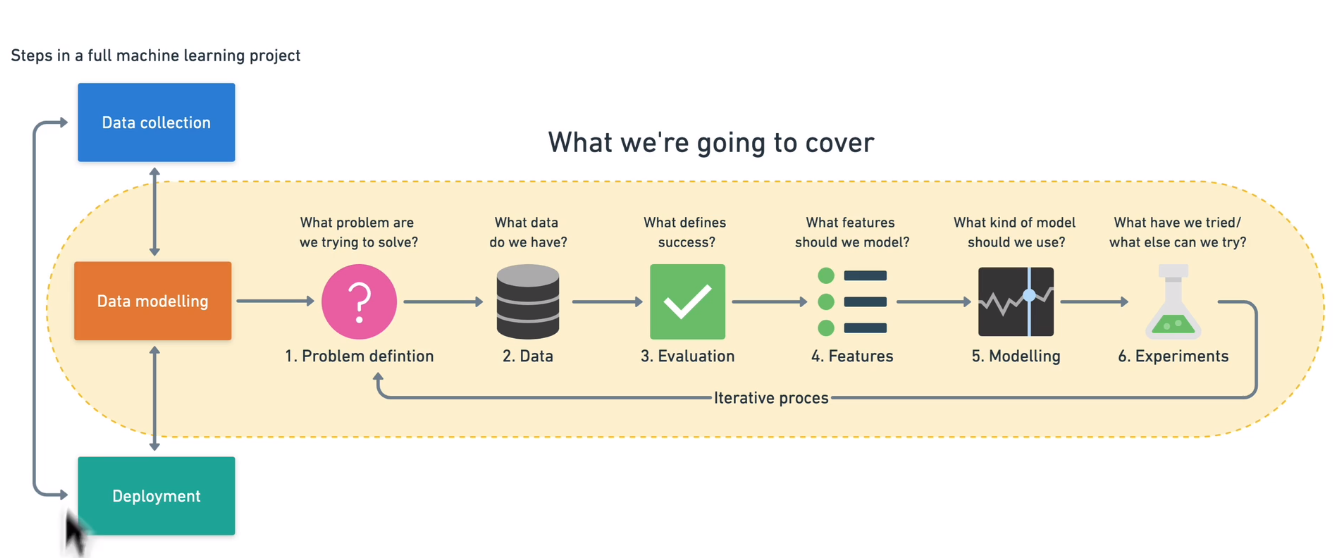

# Setting up environment
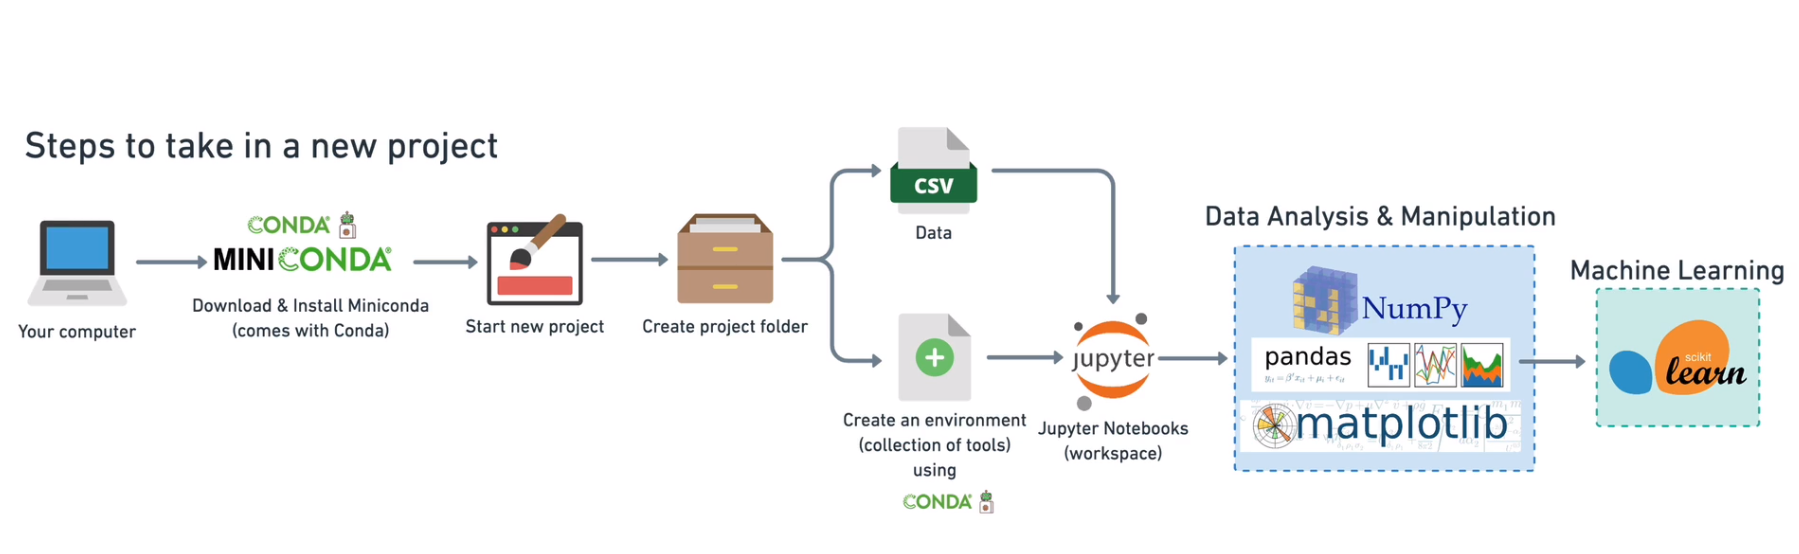

# Predicting heart disease using machine learning

This notebook looks into using various Python-base machine learning and data sience libraries in an attempt to build a machine learning model capable of predicting wheter or not someone has heart disease basee on their medical attributes.

Steps:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

Statement:
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came form the Cleaveland data from th eUCI Machine Learning Repository.
Also available on Kagge [link](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?select=heart_disease_uci.csv)

## 3. Evaluation

> If we can reach 95% accuracy at predicting wheter or not a patient has heart disease during the proof of concept, prusue the project.

## 4. Features

**Create a data dictionary**

    1. age - age in years\n
    2. sex - (1 = male; 0 = female)\n
    3. cp - chest pain type\n
        * 0: Typical angina: chest pain related decrease blood supply to the heart\n
        * 1: Atypical angina: chest pain not related to heart\n
        * 2: Non-anginal pain: typically esophageal spasms (non heart related)\n
        * 3: Asymptomatic: chest pain not showing signs of disease\n
    4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern\n
    5. chol - serum cholestoral in mg/dl\n
        * serum = LDL + HDL + .2 * triglycerides\n
        * above 200 is cause for concern\n
    6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)\n
        * '>126' mg/dL signals diabetes\n
    7. restecg - resting electrocardiographic results\n
        * 0: Nothing to note\n
        * 1: ST-T Wave abnormality\n
            * can range from mild symptoms to severe problems\n
            * signals non-normal heart beat\n
        * 2: Possible or definite left ventricular hypertrophy\n
            * Enlarged heart's main pumping chamber\n
    8. thalach - maximum heart rate achieved\n
    9. exang - exercise induced angina (1 = yes; 0 = no)\n
    10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more\n
    11. slope - the slope of the peak exercise ST segment\n
        * 0: Upsloping: better heart rate with excercise (uncommon)\n
        * 1: Flatsloping: minimal change (typical healthy heart)\n
        * 2: Downslopins: signs of unhealthy heart\n
    12. ca - number of major vessels (0-3) colored by flourosopy\n
        * colored vessel means the doctor can see the blood passing through\n
        * the more blood movement the better (no clots)\n
    13. thal - thalium stress result\n
        * 1,3: normal\n
        * 6: fixed defect: used to be defect but ok now\n
        * 7: reversable defect: no proper blood movement when excercising\n
    14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [6]:
# Create a data dictionary

# Column Descriptions:
# 1. id (Unique id for each patient)
# 2. age (Age of the patient in years)
# 3. origin (place of study)
# 4. sex (Male/Female)
# 5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
# 6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
# 7. chol (serum cholesterol in mg/dl)
# 8. fbs (if fasting blood sugar > 120 mg/dl)
# 9. restecg (resting electrocardiographic results)
#     -- Values: [normal, stt abnormality, lv hypertrophy]
# 10. thalach: maximum heart rate achieved
# 11. exang: exercise-induced angina (True/ False)
# 12. oldpeak: ST depression induced by exercise relative to rest
# 13. slope: the slope of the peak exercise ST segment
# 14. ca: number of major vessels (0-3) colored by fluoroscopy
# 15. thal: [normal; fixed defect; reversible defect]
# 16. num: the predicted attribute

# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To plot the graphs inline on jupyter notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression # Logistic Regression, Log Reg
from sklearn.neighbors import KNeighborsClassifier  # KNN, K-Nearest Neighbors
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score # train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV # RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report # confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score # precision_score, recall_score, f1_score Is a classification problem, which metric should we use?
from sklearn.metrics import RocCurveDisplay # RocCurveDisplay, after Scikit-Learn 1.2.0
# depricated from sklearn.metrics import plot_roc_curve # plot_roc_curve

